# 

In [466]:
from utilities.io_tools import input_tools,output_tools
from wremnants import histselections as hs
from wremnants import plot_tools
import hist
from utilities import boostHistHelpers as hh
import os
import matplotlib.pyplot as plt
import mplhep as hep

In [380]:
ptsel = hist.tag.Slicer()[26j:56j]

In [367]:
pt = hs.signalHistWmass(input_tools.read_and_scale("/scratch/submit/cms/kdlong/Analysis/mw_with_mu_eta_pt_scetlib_dyturboCorr_noMTCut.hdf5", "WplusmunuPostVFP", "nominal_massWeightW"))
pt = pt/pt[{"pt" : ptsel, "massShift" : "massShiftW0MeV"}].sum()

In [373]:
pt_uncorr = hs.signalHistWmass(input_tools.read_and_scale("/scratch/submit/cms/kdlong/Analysis/mw_with_mu_eta_pt_scetlib_dyturboCorr_noMTCut.hdf5", "WplusmunuPostVFP", "nominal_uncorr"))
pt_uncorr = pt_uncorr/pt_uncorr[{"pt" : ptsel}].sum()

In [33]:
mt_pfmet_mu4 = input_tools.read_and_scale("/scratch/submit/cms/kdlong/Analysis/mw_lowPU_mu_scetlib_dyturboCorr_pfMet_mu4.hdf5", "Wplusmunu", "transverseMass")

In [34]:
mt_pfmet_mu4_mw = input_tools.read_and_scale("/scratch/submit/cms/kdlong/Analysis/mw_lowPU_mu_scetlib_dyturboCorr_pfMet_mu4.hdf5", "Wplusmunu", "transverseMass_massWeightW")

In [59]:
mt_pfmet_mu2_mw = input_tools.read_and_scale("/scratch/submit/cms/kdlong/Analysis/mw_lowPU_mu_scetlib_dyturboCorr_PFMET.hdf5", "Wplusmunu", "transverseMass_massWeightW")AA

In [100]:
mt_pfmet_highpu_mw = input_tools.read_and_scale("/scratch/submit/cms/kdlong/Analysis/mw_with_mu_eta_pt_scetlib_dyturboCorr_MtPFMET_ptlcut.hdf5", "WplusmunuPostVFP", "nominal_massWeightW")
mt_pfmet_highpu_mw *= 1/mt_pfmet_highpu_mw[{"massShift" : "massShiftW0MeV"}].sum()

In [101]:
mt_pfmet_highpu_uncorr = input_tools.read_and_scale("/scratch/submit/cms/kdlong/Analysis/mw_with_mu_eta_pt_scetlib_dyturboCorr_MtPFMET_ptlcut.hdf5", "WplusmunuPostVFP", "nominal_uncorr")
mt_pfmet_highpu_uncorr *= 1/mt_pfmet_highpu_uncorr.sum()

In [117]:
mt_gen = input_tools.read_and_scale("/scratch/submit/cms/kdlong/Analysis/w_z_gen_dists_fiducial.hdf5", "WplusmunuPostVFP", "mt")
mt_gen = mt_gen/mt_gen.sum().value

In [395]:
pt_gen = input_tools.read_and_scale("/scratch/submit/cms/kdlong/Analysis/w_z_gen_dists.hdf5", "WplusmunuPostVFP", "nominal_postfsr")
#pt_gen = hs.signalHistWmass(input_tools.read_and_scale("/scratch/submit/cms/kdlong/Analysis/mw_with_mu_eta_pt_scetlib_dyturboCorr.hdf5", "WplusmunuPostVFP", "genPt"))
if "postfsrLep_pt" in pt_gen.axes.name:
    pt_gen.axes["postfsrLep_pt"]._ax.metadata["name"] = "pt"
pt_gen = pt_gen[{"pt" : ptsel}]
pt_gen = pt_gen/pt_gen.sum().value

In [382]:
pt

Hist(
  Regular(25, 0, 2.5, underflow=False, name='postfsrLep_absEta'),
  Regular(30, 26, 56, name='pt'),
  storage=Weight()) # Sum: WeightedSum(value=0.812727, variance=8.85654e-09) (WeightedSum(value=1.59432, variance=1.80841e-08) with flow)

In [362]:
pt_gen.axes[0].name

'pt'

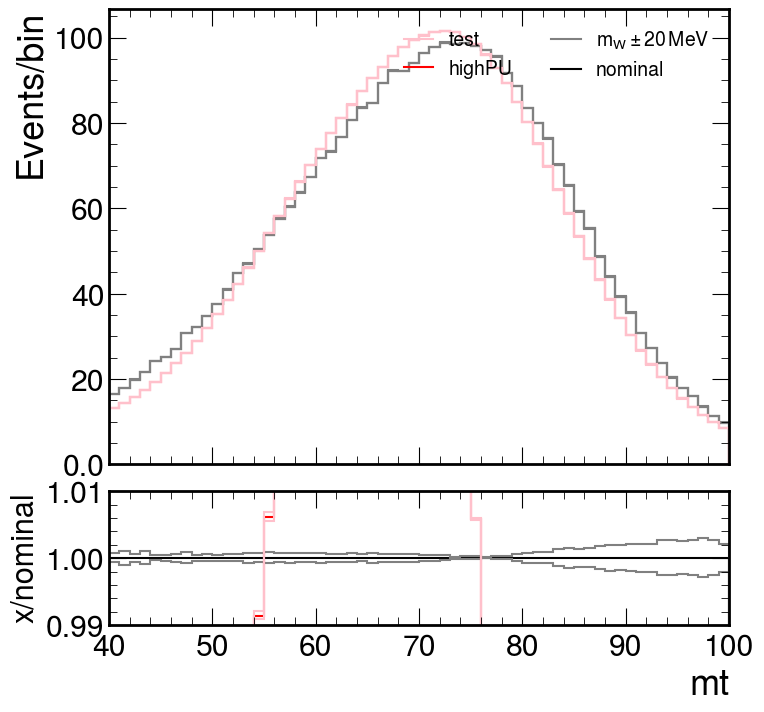

In [76]:
fig = plot_tools.makePlotWithRatioToRef(
    [hs.signalHistWmass(h).project("mt")[40j:100j]
         for h in ([mt_pfmet_mu2_mw[{"massShift": v}] for v in ["massShiftW0MeV", "massShiftW20MeVUp", "massShiftW20MeVDown"]]+
                   [mt_pfmet_highpu_mw[{"massShift": v}] for v in ["massShiftW0MeV", "massShiftW20MeVUp", "massShiftW20MeVDown"]])
    ],
    ["nominal", "$m_{W} \pm 20\,$MeV", "", "highPU", "test", ""],
    ["black", "grey", "grey", "red", "pink", "pink"], binwnorm=1., rrange=[0.99, 1.01], xlim=[40, 100])

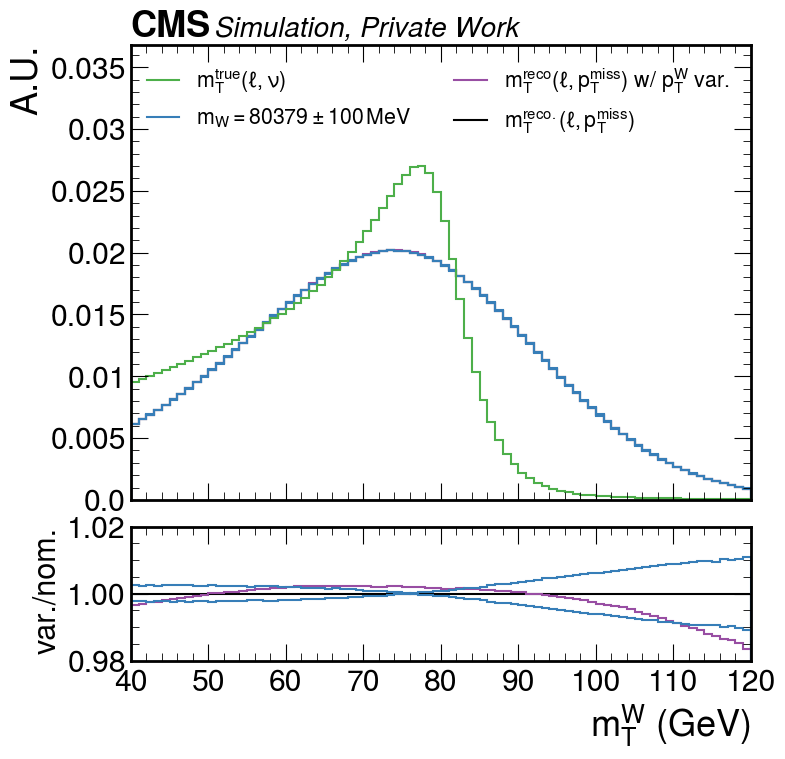

In [348]:
fig = plot_tools.makePlotWithRatioToRef(
    [h.project("mt")[40j:120j]
         for h in [mt_pfmet_highpu_mw[{"massShift": "massShiftW0MeV"}],           
                mt_pfmet_highpu_uncorr,
                mt_pfmet_highpu_mw[{"massShift": "massShiftW100MeVUp"}],
                mt_pfmet_highpu_mw[{"massShift": "massShiftW100MeVDown"}],
                mt_gen,
            ]
    ],
    ["$m_T^{reco.}(\\ell, p_{T}^{miss})$", "$m_T^{reco}(\\ell, p_{T}^{miss})$ w/ $p_{T}^{W}$ var.", "$m_{W} = 80379 \pm 100\, MeV$", "", "$m_T^{true}(\\ell, \\nu)$",],
    ["black", "#984ea3", "#377eb8", "#377eb8", "#4daf4a", ], 
    xlabel="$m_{T}^W$ (GeV)", ylabel="A.U.",
    binwnorm=1., rrange=[0.98, 1.02], xlim=[40, 120], yscale=1.3,rlabel="var./nom.",
    cms_label="Simulation, Private Work", skip_ratio=1, legtext_size=22, nlegcols=2)
out = "/eos/user/k/kelong/www/WMassAnalysis/SNSFStudies"
dir = output_tools.make_plot_dir(out, "W", eoscp=True)
out = os.path.join(out, "W")
plot_tools.save_pdf_and_png(dir, "compareRecoGenMT")
plot_tools.write_index_and_log(dir, "compareRecoGenMT")
output_tools.copy_to_eos(out)

# 

In [548]:
fig = plot_tools.makePlotWithRatioToRef(
    [hh.projectNoFlow(h, "pt")
         for h in [pt[{"massShift": "massShiftW0MeV"}],           
                pt_uncorr,
                pt[{"massShift": "massShiftW100MeVUp"}],
                pt[{"massShift": "massShiftW100MeVDown"}],
                pt[...,10],
            ]
    ],
    ["$p_T^{\\ell,reco.}$", "$p_T^{\\ell,reco}$ w/ $p_{T}^{W}$ var.", "$m_{W} = 80379 \pm 100\, MeV$", "", "$p_T^{\\ell,true}$",],
    ["black", "#984ea3", "#377eb8", "#377eb8", "#4daf4a", ], 
    xlabel="$p_{T}^\\ell$ (GeV)", ylabel="A.U.",
    binwnorm=1., rrange=[0.98, 1.02], yscale=1.3,rlabel="var./nom.",
    #cms_label="Simulation, Private Work", skip_ratio=1, legtext_size=24, nlegcols=2)
    cms_label="Simulation", skip_ratio=1, legtext_size=24, nlegcols=2)
out = "/eos/user/k/kelong/www/WMassAnalysis/SNSFStudies"
dir = output_tools.make_plot_dir(out, "W", eoscp=True)
out = os.path.join(out, "W")
plot_tools.save_pdf_and_png(dir, "compareRecoGenPtl_recoMatch")
plot_tools.write_index_and_log(dir, "compareRecoGenPtl_recoMatch")
output_tools.copy_to_eos(out)


TypeError: makePlotWithRatioToRef() got an unexpected keyword argument 'skip_ratio'

In [426]:
mt_mu23 = hs.signalHistWmass(input_tools.read_and_scale("/scratch/submit/cms/kdlong/Analysis/mw_with_mu_eta_pt_scetlib_dyturboCorr.hdf5", "WplusmunuPostVFP", "transverseMass"))

In [427]:
mt_mu23_pf = hs.signalHistWmass(input_tools.read_and_scale("/scratch/submit/cms/kdlong/Analysis/mw_with_mu_eta_pt_scetlib_dyturboCorr_mT_PFMET.hdf5", "WplusmunuPostVFP", "transverseMass"))

In [541]:
mt_mu2_pf = hs.signalHistWmass(input_tools.read_and_scale("/scratch/submit/cms/kdlong/Analysis/mw_lowPU_mu_scetlib_dyturboCorr_mu1.hdf5", "Wplusmunu", "transverseMass"))

In [542]:
mt_mu5_pf = hs.signalHistWmass(input_tools.read_and_scale("/scratch/submit/cms/kdlong/Analysis/mw_lowPU_mu_scetlib_dyturboCorr_mu4.hdf5", "Wplusmunu", "transverseMass"))

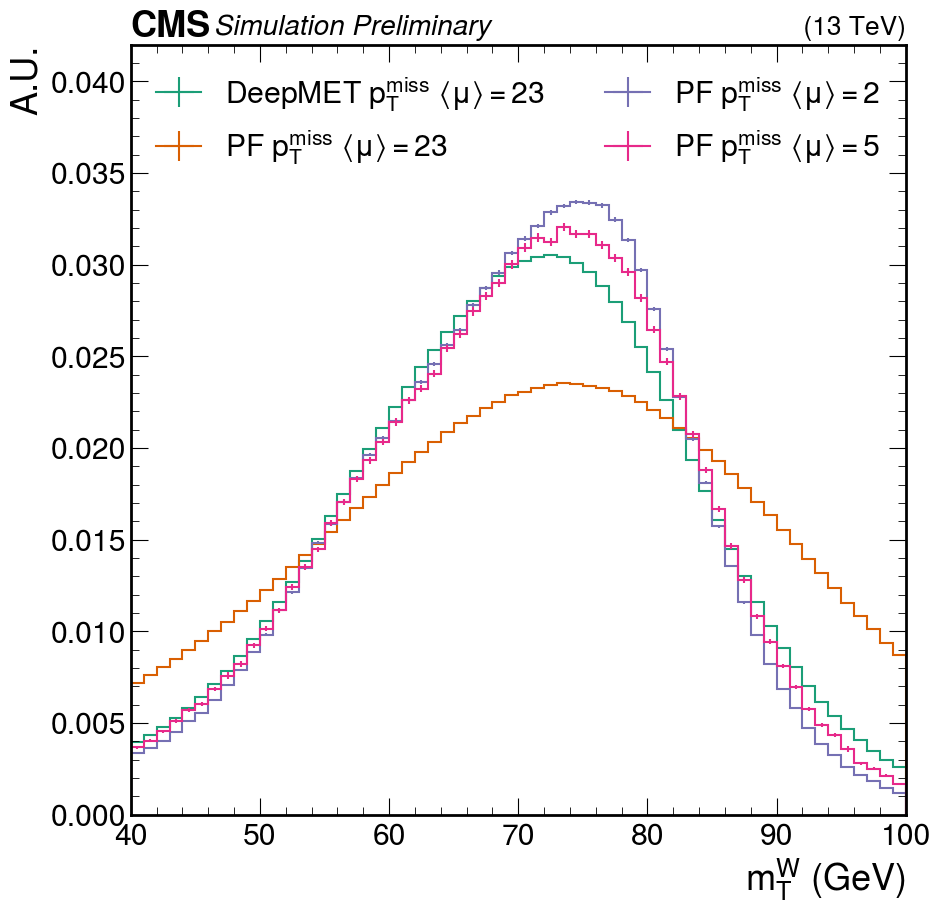

In [546]:
hs.signalHistWmass(mt_mu23).project("mt")[40j:100j].plot(density=True, label="DeepMET $p_{T}^{miss}$ $\\langle\\mu\\rangle = 23$", flow='none', color="#1b9e77")
hs.signalHistWmass(mt_mu23_pf).project("mt")[40j:100j].plot(density=True, label="PF $p_{T}^{miss}$ $\\langle\\mu\\rangle = 23$", flow='none', color="#d95f02")
hs.signalHistWmass(mt_mu2_pf).project("mt")[40j:100j].plot(density=True, label="PF $p_{T}^{miss}$ $\\langle\\mu\\rangle = 2$", flow='none', color="#7570b3")
a = hs.signalHistWmass(mt_mu5_pf).project("mt")[40j:100j].plot(density=True, label="PF $p_{T}^{miss}$ $\\langle\\mu\\rangle = 5$", flow='none', color="#e7298a")
plt.legend(loc='upper center', ncol=2)
plt.xlim([40,100])
plt.ylim([0, .042])
plt.xlabel("$m_{T}^W$ (GeV)")
plt.ylabel("A.U.")
hep.cms.label(fontsize=20, data=False, label="Preliminary")
out = "/eos/user/k/kelong/www/WMassAnalysis/SNSFStudies"
dir = output_tools.make_plot_dir(out, "W", eoscp=True)
out = os.path.join(out, "W")
plot_tools.save_pdf_and_png(dir, "compareRecoMT")
plot_tools.write_index_and_log(dir, "compareRecoMT")
output_tools.copy_to_eos(out)

In [488]:
import pandas as pd
import math

# 

# 

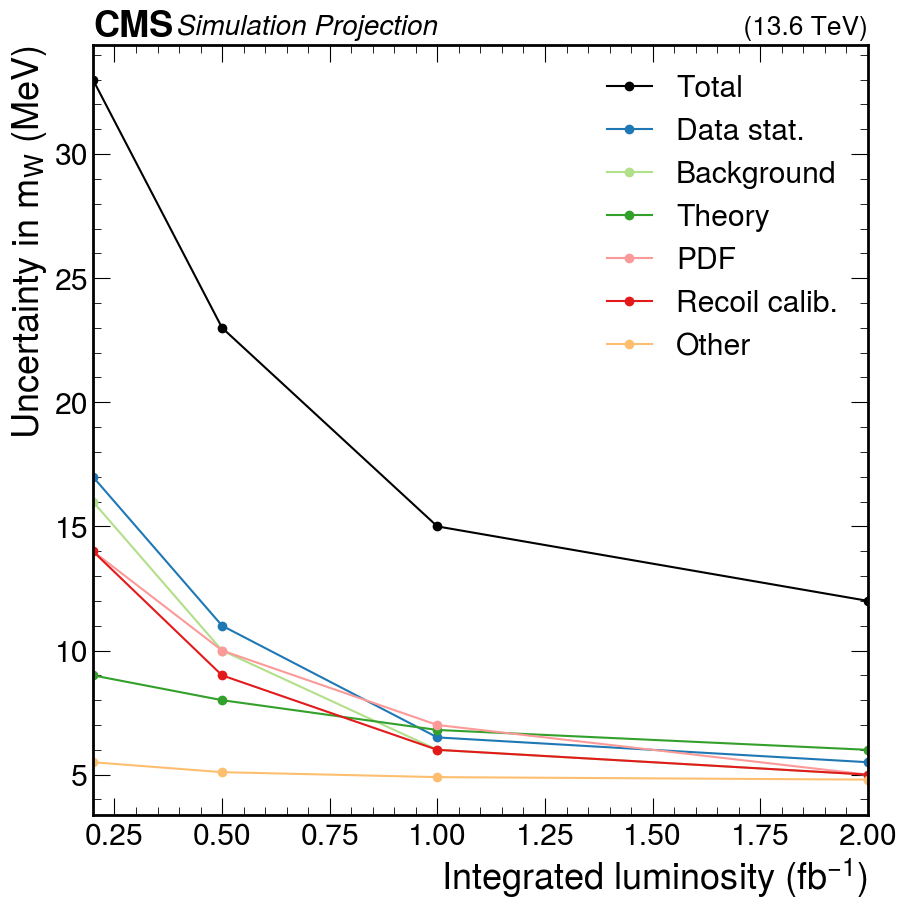

In [547]:
df = pd.DataFrame.from_dict({"Total" : [33, 23, 15, 12],
                "Data stat." : [17, 11, 6.5, 5.5], 
                "Background" : [16, 10, 6, 5],
                "Theory" : [9, 8, 6.8, 6],
                "PDF" : [14, 10, 7, 5],
                "Recoil calib." : [14, 9, 6, 5],
                "Other" : [5.5, 5.1, 4.9, 4.8],
                "lumi" : [0.2, 0.5, 1.0, 2.0],
                  })
df.plot.line(x="lumi", marker="o",
    color={"Total" : "black", 
        "Data stat." : "#1f78b4",
        "Background" : "#b2df8a",
        "Theory" : "#33a02c",
        "PDF" : "#fb9a99",
        "Recoil calib." : "#e31a1c",
        "Other" : "#fdbf6f",
    }
)
plt.xlim([0.2, 2.0])
hep.cms.label(fontsize=20, data=False, label="Projection", com=13.6)
plt.xlabel("Integrated luminosity (fb$^{-1})$")
plt.ylabel("Uncertainty in $m_{W}$ (MeV)")
out = "/eos/user/k/kelong/www/WMassAnalysis/SNSFStudies"
dir = output_tools.make_plot_dir(out, "W", eoscp=True)
out = os.path.join(out, "W")
plot_tools.save_pdf_and_png(dir, "lowPUProjection")
plot_tools.write_index_and_log(dir, "lowPUProjection")
output_tools.copy_to_eos(out)

In [502]:
df.iloc[0,2:]

Background       16.0
Modeling         12.0
PDF              12.0
Recoil calib.    14.0
Other             5.5
Name: 0, dtype: float64

In [531]:
for i in range(len(df)):
    print(df["Total"][i], math.sqrt(sum(pow(df.iloc[i,1:],2))))

33 32.37730686761949
23 22.18693309134906
15 15.620819440733575
12 12.972663566130127
